In [1]:
## import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


Text(0, 0.5, 'y label')

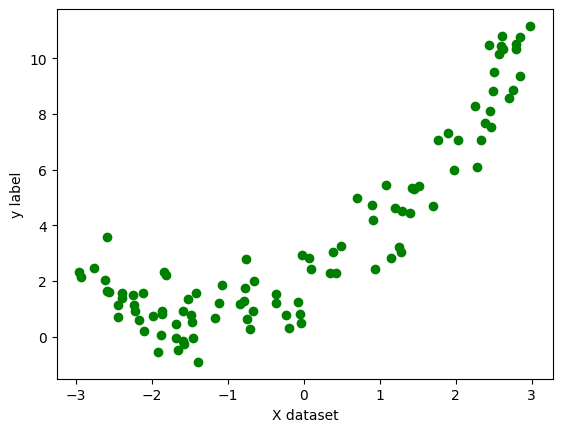

In [2]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2+1.5*X+2+np.random.randn(100,1)
# quadratic equation used y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('y label')
 

In [3]:
X[:3]

array([[-1.47839856],
       [-2.23570025],
       [-2.09819752]])

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
X_train.shape

(80, 1)

In [7]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [8]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression.predict(X_test))
print(score)

0.8011101090505779


Text(0, 0.5, 'Y label')

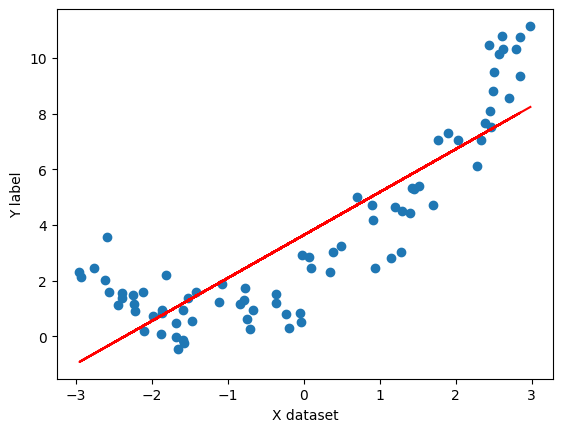

In [9]:
## Lets visualize this model
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("Y label")

In [10]:
# Lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train) #[1,a,a^2]
X_test_poly=poly.transform(X_test)


In [12]:
X_train[:3]

array([[2.98152174],
       [2.48802896],
       [0.89336453]])

In [13]:
X_train_poly[:3]

array([[1.        , 2.98152174, 8.88947186],
       [1.        , 2.48802896, 6.19028811],
       [1.        , 0.89336453, 0.79810018]])

In [14]:
X_test_poly[:3]

array([[ 1.        , -0.76168066,  0.58015743],
       [ 1.        , -0.65784665,  0.43276221],
       [ 1.        , -1.45277192,  2.11054626]])

In [15]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.91862887449561


In [16]:
print(regression.coef_)

[[0.         1.45760537 0.5582871 ]]


In [17]:
y_pred[:3]

array([[0.95314858],
       [1.02220874],
       [0.80020659]])

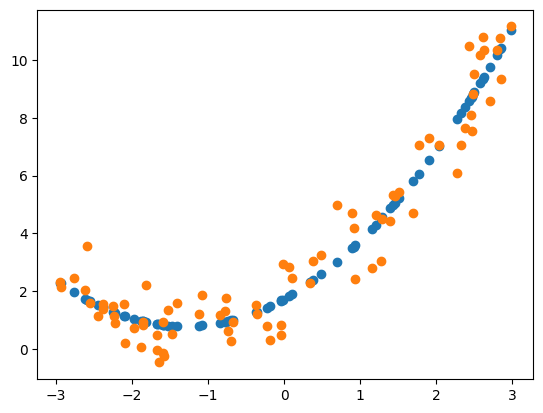

In [18]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [19]:
X_train_poly[:5]

array([[ 1.00000000e+00,  2.98152174e+00,  8.88947186e+00],
       [ 1.00000000e+00,  2.48802896e+00,  6.19028811e+00],
       [ 1.00000000e+00,  8.93364530e-01,  7.98100183e-01],
       [ 1.00000000e+00, -1.92625509e-02,  3.71045866e-04],
       [ 1.00000000e+00,  2.50368348e+00,  6.26843097e+00]])

In [20]:
# Prediction of new data set
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
X_new_poly[:5]

array([[ 1.        , -3.        ,  9.        ],
       [ 1.        , -2.96984925,  8.82000455],
       [ 1.        , -2.93969849,  8.64182723],
       [ 1.        , -2.90954774,  8.46546804],
       [ 1.        , -2.87939698,  8.290927  ]])

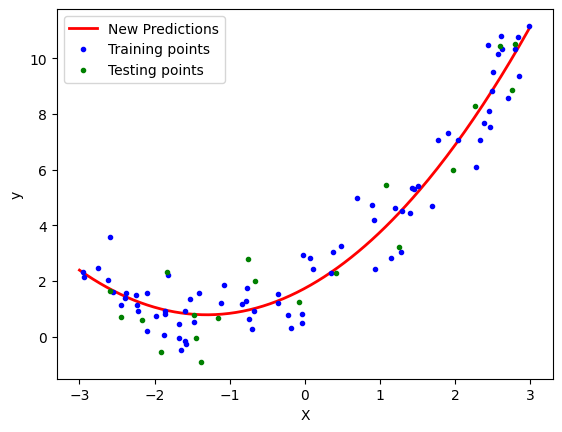

In [21]:
y_new=regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label='New Predictions')
plt.plot(X_train,y_train,"b.",label='Training points')
plt.plot(X_test,y_test,"g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [22]:
import statsmodels.api as sm

In [23]:
model=sm.OLS(y_train,X_train_poly).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     567.8
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           8.05e-47
Time:                        15:14:58   Log-Likelihood:                -99.186
No. Observations:                  80   AIC:                             204.4
Df Residuals:                      77   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7395      0.154     11.263      0.000       1.432       2.047
x1             1.4576      0.052     28.013      0.000       1.354       1.561
x2             0.5583      0.036     15.597      0.000       0.487       0.630
==============================================================================
Omnibus:                        0.625   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.732   Jarque-Bera (JB):                0.742
Skew:                           0.103   Prob(JB):                        0.690
Kurtosis:                       2.576   Cond. No.                         7.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from sklearn.pipeline import Pipeline

In [32]:
def poly_regression(degree):
    X_new=np.linspace(-3,3,200).reshape(200,1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## polynomial and fit of Linear regression
    y_pred_new=poly_regression.predict(X_new)
    # plotting prediction line
    plt.plot(X_new,y_pred_new,'r',label="Degree"+str(degree),linewidth=2)
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g .",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4,0,10])
    plt.show()


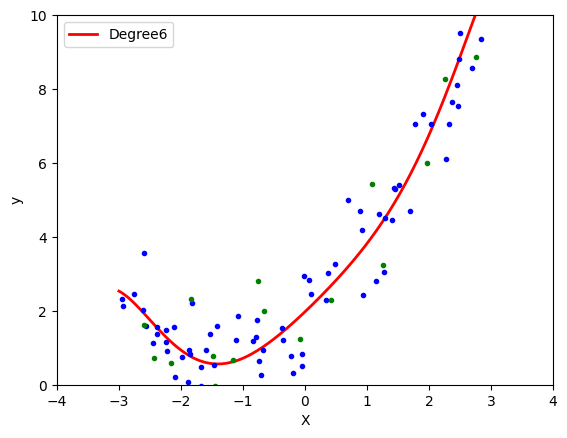

In [35]:
poly_regression(6)